In [1]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Live.csv')
data.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.shape

(7050, 16)

In [25]:
col=data.columns
col

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [22]:
p=list(col)
for i in p[12:16] :
         data=data.drop(columns=i)
data.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0


In [15]:
l=p[12:16]
l

['Column1', 'Column2', 'Column3', 'Column4']

In [27]:
for i in p :
    print(data[i].value_counts())

819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64
photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64
3/20/2018 1:54     3
12/28/2017 8:09    2
4/30/2018 6:20     2
4/26/2018 19:00    2
4/23/2018 7:26     2
                  ..
9/6/2012 9:01      1
9/6/2012 9:16      1
9/6/2012 23:17     1
9/7/2012 0:21      1
9/10/2016 10:30    1
Name: status_published, Length: 6913, dtype: int64
1       131
2       124
14      121
0       121
3       116
       ... 
2826      1
2032      1
2154      1
1997      1
415       1
Name: num_reactions, 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [36]:
data.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [68]:
data[(data['status_published']=='7/15/2017 10:52')&(data['status_type']=='video')].value_counts()

status_id                          status_type  status_published  num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys
1050855161656896_1339706342771775  video        7/15/2017 10:52   253            4432          167         209        29         5         5          5         0             1
dtype: int64

In [69]:
-colour=['red','blue','green','yellow','cyan']
n=0
for i in range(0,len(colour)):
  plt.scatter(X[df['Clusters(5)']==i],Y[df['Clusters(5)']==i],s=10,c=colour[i])
  plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], color='black')

NameError: ignored

In [78]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['status_published']= label_encoder.fit_transform(data['status_published'])

data['status_published'].unique()

array([3949, 3917, 3921, ..., 6643, 6625, 6463])

In [71]:
data=data.drop(columns='status_id')

In [80]:
scaler = StandardScaler()

df_array = scaler.fit_transform(data)
data_scaled = pd.DataFrame(df_array, columns = data.columns)


In [81]:
data_scaled

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,-1.247999,0.245462,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,0.441725,0.229374,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-1.247999,0.231385,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,0.441725,0.230883,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,0.441725,0.186642,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...,...,...
7045,0.441725,1.623966,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,0.441725,1.616425,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,0.441725,1.599835,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,0.441725,1.590785,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


In [82]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,7050.0,0.000000e+00,1.000071,-1.247999,-1.247999,0.441725,0.441725,3.821174
status_published,7050.0,-3.628303e-17,1.000071,-1.739845,-0.863449,0.003897,0.861692,1.735071
num_reactions,7050.0,0.000000e+00,1.000071,-0.497451,-0.460702,-0.368828,-0.024032,9.684296
num_comments,7050.0,0.000000e+00,1.000071,-0.252206,-0.252206,-0.247710,-0.226351,23.343365
num_shares,7050.0,0.000000e+00,1.000071,-0.304144,-0.304144,-0.304144,-0.273747,25.715945
num_likes,7050.0,1.612579e-17,1.000071,-0.478469,-0.440644,-0.349419,-0.067402,10.001228
num_loves,7050.0,0.000000e+00,1.000071,-0.318454,-0.318454,-0.318454,-0.243398,16.118835
num_wows,7050.0,8.062896e-18,1.000071,-0.147879,-0.147879,-0.147879,-0.147879,31.736395
num_hahas,7050.0,-1.612579e-17,1.000071,-0.176010,-0.176010,-0.176010,-0.176010,39.501488
num_sads,7050.0,-8.062896e-18,1.000071,-0.152587,-0.152587,-0.152587,-0.152587,31.781438


In [76]:
data['status_type']=data['status_type'].map({'video':0,'photo':1,'status':2,'link':3})

In [83]:
# Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep = True)

In [87]:
# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)

    sse[k] = kmeans.inertia_
    # print(kmeans.inertia_)

In [88]:
sse

{1: 77549.99999999988,
 2: 61982.98129885273,
 3: 51949.93656238924,
 4: 45821.37296605909,
 5: 40866.53389963502,
 6: 37008.75849898209,
 7: 33225.35465007582,
 8: 30023.629517839938,
 9: 27353.313819053154,
 10: 24429.788361953848,
 11: 22814.509019488498,
 12: 21476.913224887576,
 13: 20775.682041853328,
 14: 19747.549322467075,
 15: 19054.926980382526,
 16: 18055.50369217261,
 17: 17472.729079773126,
 18: 16727.122048900674,
 19: 16139.203893816062}

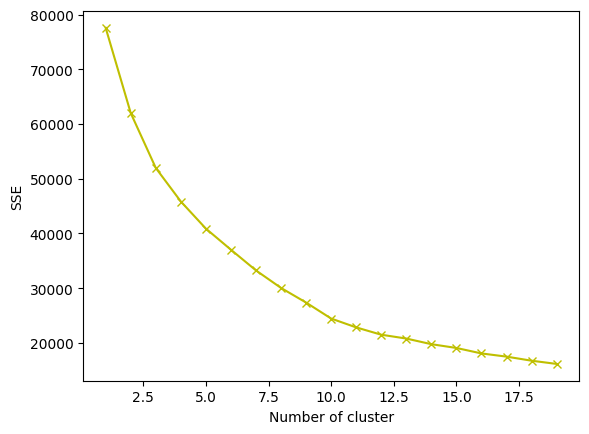

In [89]:

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'yx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

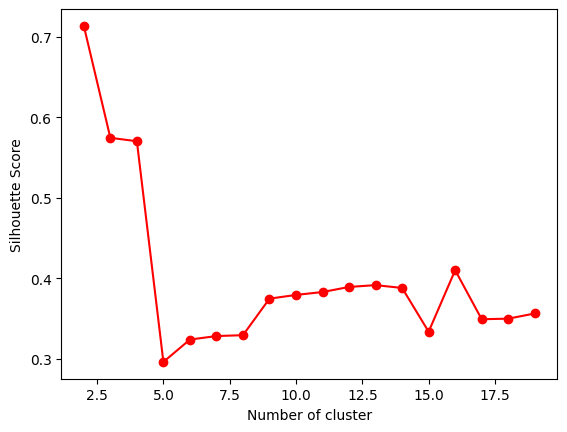

In [91]:
# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)

    labels = kmeans.predict(data_scaled)

    sc[k] = silhouette_score(data_scaled, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'ro-')

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()